In [1]:
import sys
from pathlib import Path
sys.path.append(Path("../modules/").absolute().__str__())

from data_utils import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = load_dataset(Path("../outputs/batch_run/template_test_3/concatened-evaluations.json"))
df.head()

,model_name,num_rows,num_gen_fail,num_exec_timeout,num_exec_fail,num_exec_empty,num_exec_to_eval,num_eval,num_eval_empty,gold_num_rows,...,get_nested_values_mean_average_precision,id_precision,id_recall,id_mean_reciprocal_rank,id_mean_average_precision,cross_precision,cross_recall,cross_mean_reciprocal_rank,cross_mean_average_precision,correct_syntax
0,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,34,17,179,136,147,147,0,503,...,0.138355,0.197279,0.306122,0.24263,0.170188,0.24898,0.421769,0.386848,0.200009,0.904483


In [3]:
df[['model_name', 'num_rows', 'num_gen_fail', 'num_exec_timeout',
       'num_exec_fail', 'num_exec_empty', 'num_exec_to_eval', 'num_eval',
       'num_eval_empty', 'gold_num_rows', 'gold_num_exec_timeout',
       'gold_num_exec_fail', 'gold_num_exec_empty', 'gold_num_exec_to_eval',
       'gold_num_eval_empty']]

,model_name,num_rows,num_gen_fail,num_exec_timeout,num_exec_fail,num_exec_empty,num_exec_to_eval,num_eval,num_eval_empty,gold_num_rows,gold_num_exec_timeout,gold_num_exec_fail,gold_num_exec_empty,gold_num_exec_to_eval,gold_num_eval_empty
0,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,34,17,179,136,147,147,0,503,10,0,0,503,19


In [4]:
print(df.columns)

Index(['model_name', 'num_rows', 'num_gen_fail', 'num_exec_timeout',
       'num_exec_fail', 'num_exec_empty', 'num_exec_to_eval', 'num_eval',
       'num_eval_empty', 'gold_num_rows', 'gold_num_exec_timeout',
       'gold_num_exec_fail', 'gold_num_exec_empty', 'gold_num_exec_to_eval',
       'gold_num_eval_empty', 'bleu_score', 'meteor_score', 'rouge1', 'rouge2',
       'rougeL', 'rougeLsum', 'get_nested_values_precision',
       'get_nested_values_recall', 'get_nested_values_mean_reciprocal_rank',
       'get_nested_values_mean_average_precision', 'id_precision', 'id_recall',
       'id_mean_reciprocal_rank', 'id_mean_average_precision',
       'cross_precision', 'cross_recall', 'cross_mean_reciprocal_rank',
       'cross_mean_average_precision', 'correct_syntax'],
      dtype='object')


In [5]:
model_names = df["model_name"].map(lambda x: x[x.rfind("-", 0, x.rfind('-', 0, x.rfind('-')))+1:])
model_names

0    template-template-stsparql
Name: model_name, dtype: object

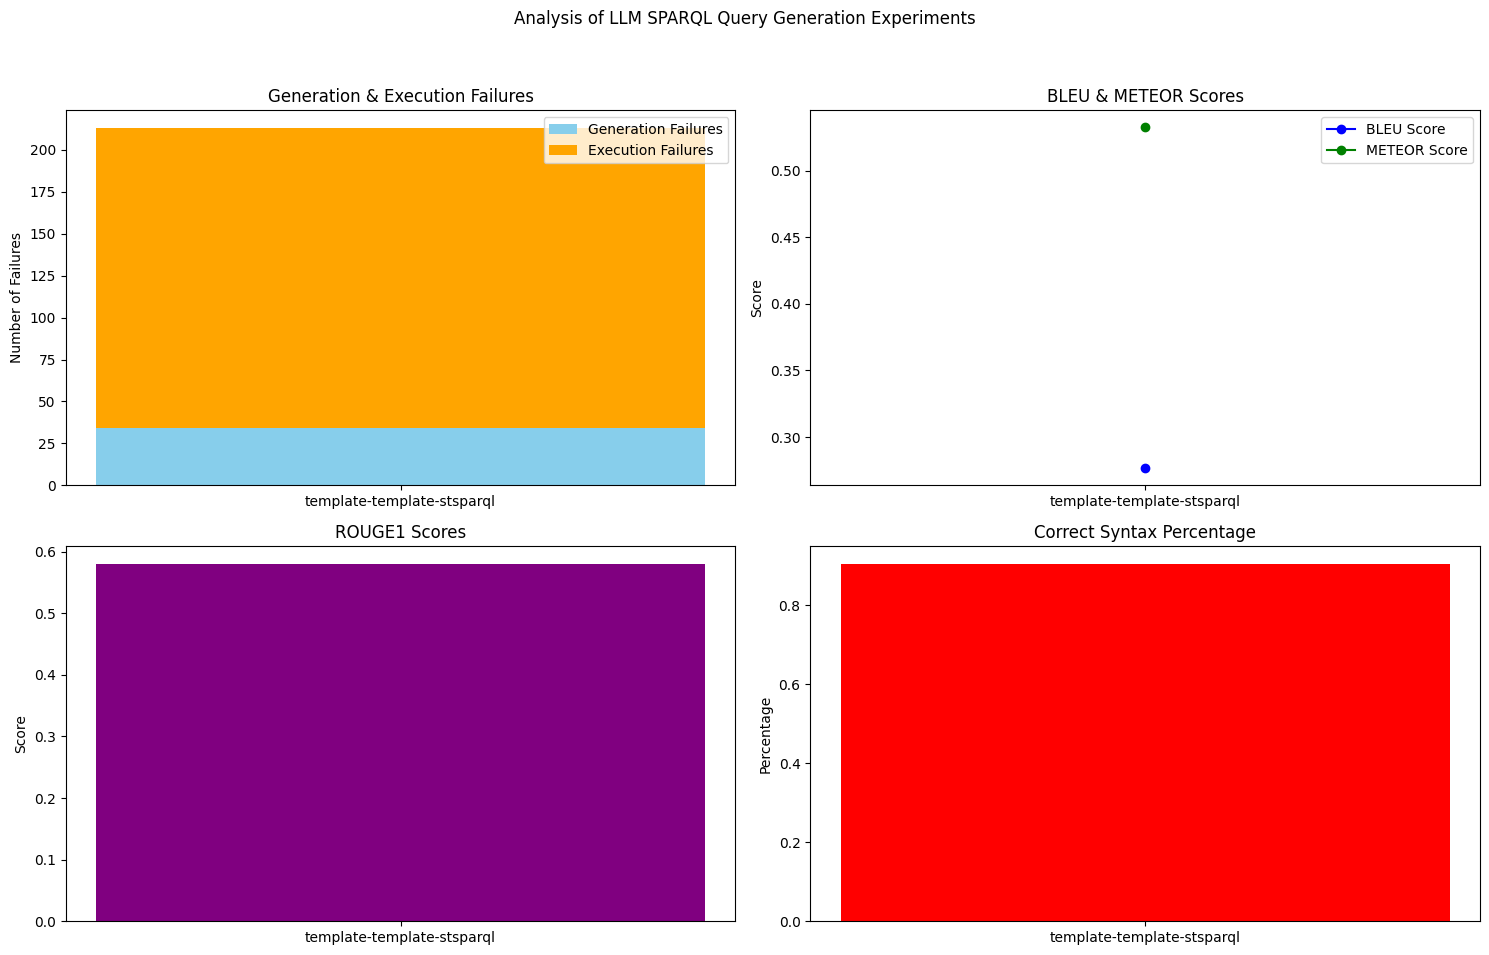

In [6]:

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analysis of LLM SPARQL Query Generation Experiments')

# Generation and Execution Failures
axs[0, 0].bar(model_names, df["num_gen_fail"], color='skyblue', label='Generation Failures')
axs[0, 0].bar(model_names, df["num_exec_fail"], bottom=df["num_gen_fail"], color='orange', label='Execution Failures')
axs[0, 0].set_title('Generation & Execution Failures')
axs[0, 0].set_ylabel('Number of Failures')
axs[0, 0].legend()

# BLEU and METEOR Scores
axs[0, 1].plot(model_names, df["bleu_score"], marker='o', linestyle='-', color='blue', label='BLEU Score')
axs[0, 1].plot(model_names, df["meteor_score"], marker='o', linestyle='-', color='green', label='METEOR Score')
axs[0, 1].set_title('BLEU & METEOR Scores')
axs[0, 1].set_ylabel('Score')
axs[0, 1].legend()

# ROUGE1 Scores
axs[1, 0].bar(model_names, df["rouge1"], color='purple')
axs[1, 0].set_title('ROUGE1 Scores')
axs[1, 0].set_ylabel('Score')

# Correct Syntax
axs[1, 1].bar(model_names, df["correct_syntax"], color='red')
axs[1, 1].set_title('Correct Syntax Percentage')
axs[1, 1].set_ylabel('Percentage')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

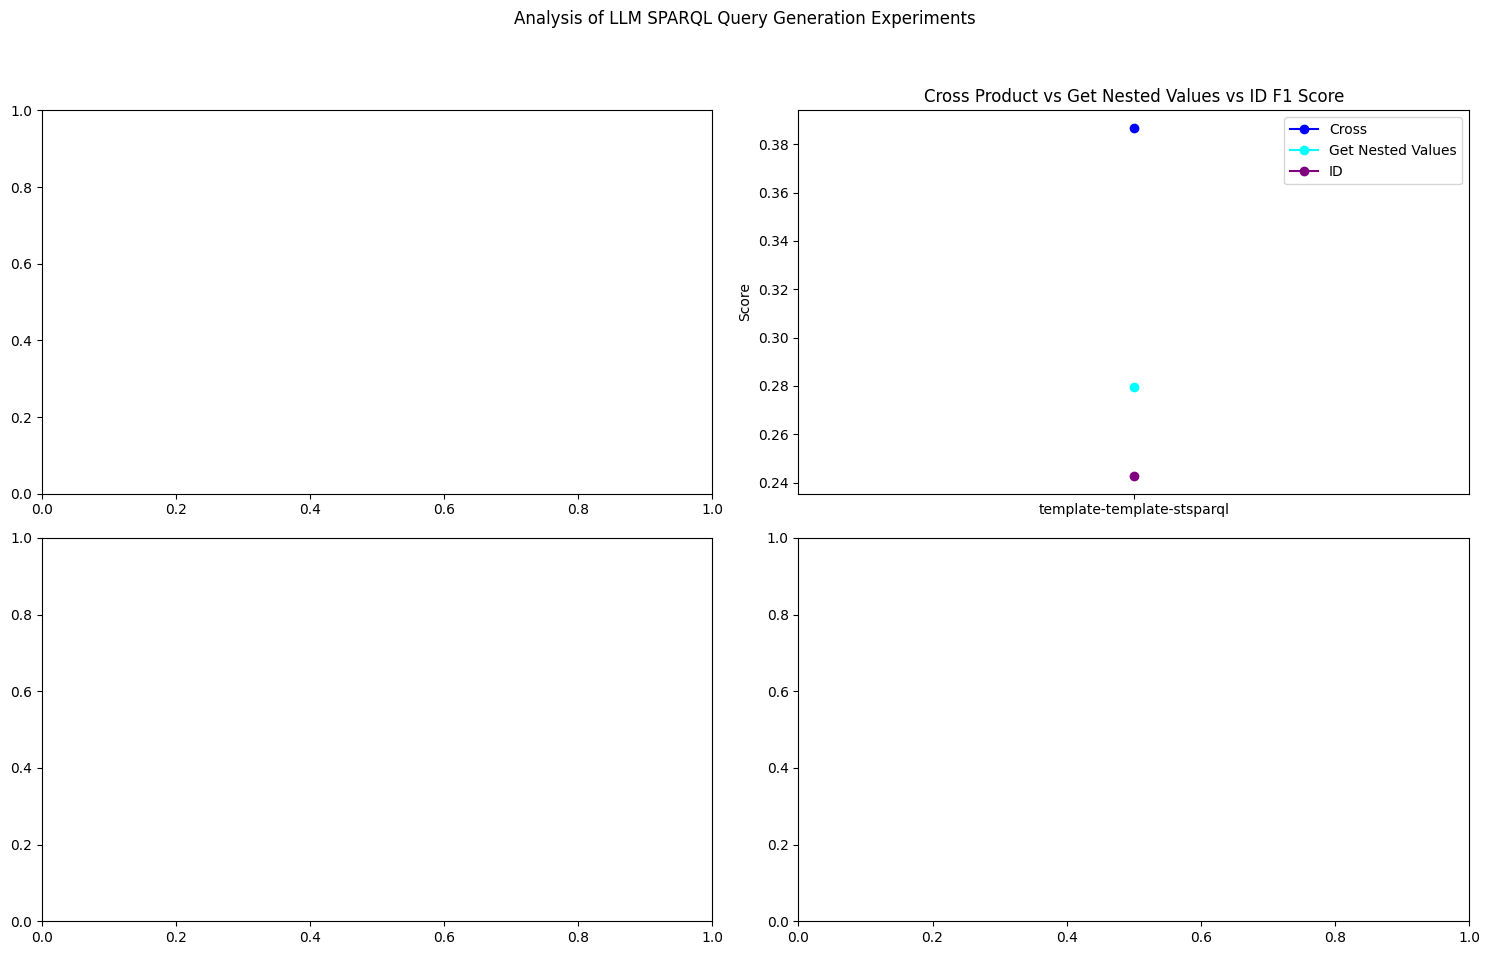

In [7]:
# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analysis of LLM SPARQL Query Generation Experiments')

# Generation and Execution Failures
# axs[0, 0].bar(model_names, df["cross_f1score"], color='skyblue', label='Generation Failures')
# axs[0, 0].bar(model_names, df["cross_f1score"], bottom=df["num_gen_fail"], color='orange', label='Execution Failures')
# axs[0, 0].set_title('Generation & Execution Failures')
# axs[0, 0].set_ylabel('Number of Failures')
# axs[0, 0].legend()

# BLEU and METEOR Scores
axs[0, 1].plot(model_names, df["cross_mean_reciprocal_rank"], marker='o', linestyle='-', color='blue', label='Cross')
axs[0, 1].plot(model_names, df["get_nested_values_mean_reciprocal_rank"], marker='o', linestyle='-', color='cyan', label='Get Nested Values')
axs[0, 1].plot(model_names, df["id_mean_reciprocal_rank"], marker='o', linestyle='-', color='purple', label='ID')
axs[0, 1].set_title('Cross Product vs Get Nested Values vs ID F1 Score')
axs[0, 1].set_ylabel('Score')
axs[0, 1].legend()

# ROUGE1 Scores
# axs[1, 0].plot(model_names, df["get_nested_values_f1score"], marker='o', linestyle='-', color='blue', label='BLEU Score')
# axs[1, 0].plot(model_names, df["get_nested_values_f1score"], marker='o', linestyle='-', color='green', label='METEOR Score')
# axs[1, 0].set_title('Cross Product F1 Score')
# axs[1, 0].set_ylabel('Score')
# axs[1, 0].legend()

# Correct Syntax
# axs[1, 1].plot(model_names, df["id_f1score"], marker='o', linestyle='-', color='blue', label='BLEU Score')
# axs[1, 1].plot(model_names, df["id_f1score"], marker='o', linestyle='-', color='green', label='METEOR Score')
# axs[1, 1].set_title('Cross Product F1 Score')
# axs[1, 1].set_ylabel('Score')
# axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [8]:
model_data = df.iloc[1]
print(model_data.model_name)

IndexError: single positional indexer is out-of-bounds

In [ ]:
exec_path = Path(f'../outputs/batch_run/template_test/execution/{model_data.model_name}_engpeft-t02-topp095-nt1024-stquery-etquery_executed.parquet.gzip')
if not exec_path.exists():
    raise FileNotFoundError()

In [ ]:
df_exec = load_dataset(exec_path)
df_exec.head()

,row,last_executed_step,to_be_executed_step,output,status,has_error,basic_input,templated_input,target_raw,target_template,execution,executed_query
index,,,,,,,,,,,,
895,"""Find places in America that have English name...",LLMTranslator,,SELECT ?item ?itemLabel ?englishLabel ?english...,,False,"[""Find pairs of places in America and England ...","""Find places in America that have English name...",SELECT ?placeInAmerica ?placeInEngland ?americ...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,[],PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
1716,"""Find cities that have more Wikipedia sitelink...",LLMTranslator,,SELECT ?city ?cityLabel ?country ?countryLabel...,,False,"[""Find cities that have more Wikipedia sitelin...","""Find cities that have more Wikipedia sitelink...",SELECT ?country ?countryLabel ?countrySitelink...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,[],PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
333,"""Write a SparQL query to retrieve the author, ...",,LLMTranslator,,"Unexpected err.msg=""The LLM result doesn't mat...",True,"[""Write a SparQL query to retrieve the author,...","""Write a SparQL query to retrieve the author, ...",SELECT ?author ?authorLabel ?letter ?letterLab...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: query is empty,
1192,"""Write a SparQL query to retrieve the birth pl...",LLMTranslator,,SELECT ?person ?personLabel ?taxon ?taxonLabel...,,False,"[""Write a SparQL query to retrieve the name, l...","""Write a SparQL query to retrieve the birth pl...",SELECT ?person ?personLabel ?taxon ?taxonLabel...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,"[{'taxon': {'type': 'uri', 'value': 'http://ww...",PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
1518,"""Find and display the labels, locations (if av...",LLMTranslator,,SELECT ?item ?itemLabel ?location ?typeLabel W...,,False,"[""Find the SparQL query to retrieve the name, ...","""Find and display the labels, locations (if av...",SELECT ?library ?libraryLabel ?coordinate_loca...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,[],PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...


In [ ]:
def status_error_type(message:str):
    if message == "":
        return "no"
    
    if message.startswith("Unexpected err.msg=\"The LLM result doesn't match desired format.\""):
        return "NoSparqlMatch"
    
    return "other"

def find_libwikidatallm_error_proportions(df:pd.DataFrame):
    return df.status.map(status_error_type)

libwikidatallm_errors_proportions = find_libwikidatallm_error_proportions(df_exec).value_counts()
libwikidatallm_errors_proportions

status
no               257
NoSparqlMatch    256
Name: count, dtype: int64

In [ ]:
row_number = 3
row = df_exec.loc[df_exec['has_error']].iloc[row_number]
answer = re.search(r"err.sparql='([\w\s\d\[\]\/\<\>\:,.\"#\\?\{\};\(\)\-*]*)'", row.status)

if answer == None or len(answer.groups()) == 0:
    print(bytes(row.status, "utf-8").decode("unicode_escape"))
    raise IndexError("No answer was found in the status.")

generated_by_llm = answer.groups()[0]
query = re.search(r"\[\/INST\] (.*)", generated_by_llm)
if query == None or len(query.groups()) == 0:
    raise IndexError("No query was found in the answer.")

query_generated = bytes(query.groups()[0], "utf-8").decode("unicode_escape")
print(query_generated)
print("-----")
print(row['target_raw'])
print("-----")
print(bytes(generated_by_llm, "utf-8").decode("unicode_escape"))

SELECT ?year ?diameter ?item ?itemLabel
WHERE {
?item wdt:P31 wd:Q122490.
?item wdt:P571 ?diameter.
?item wdt:P577 ?date.
BIND(YEAR(?date) AS ?year)
SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
ORDER BY ?year ?diameter
LIMIT 100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [ ]:
row_number = 3
row = df_exec.loc[~df_exec['has_error']].iloc[row_number]
print(row.translated_prompt)

AttributeError: 'Series' object has no attribute 'translated_prompt'

In [ ]:
df_exec.loc[~df_exec['has_error']].loc[df_exec['execution'].str.startswith(('exception'))].head()

,row,last_executed_step,to_be_executed_step,translated_prompt,status,has_error,extracted_entities,extracted_properties,linked_entities,linked_properties,output,basic_input,templated_input,target_raw,target_template,execution,executed_query
index,,,,,,,,,,,,,,,,,
834,"""Find the top 100 programming languages and th...",SimplePlaceholderFiller,,SELECT ?language ?languageLabel ?locationLabel...,,False,[computer programming language],"[instance of, subclass of, creator, educated a...","[[computer programming language, [Q9143, progr...","[[instance of, [P31, instance of]], [subclass ...",SELECT ?language ?languageLabel ?locationLabel...,"[""Find the primary programming language of fam...","""Find the top 100 programming languages and th...",SELECT ?lang ?langLabel ?human ?humanLabel ?ed...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: 400 Client Error: Bad Request for u...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
562,"""Find the top 10 bodies of water that have the...",SimplePlaceholderFiller,,SELECT ?watercourse ?watercourseLabel ?waterco...,,False,"[watercourse, water body]","[instance of, end point, instance of]","[[watercourse, [Q355304, watercourse]], [water...","[[instance of, [P31, instance of]], [end point...",SELECT ?watercourse ?watercourseLabel ?waterco...,"[""Which body of water has the most watercourse...","""Find the top 10 bodies of water that have the...",SELECT ?mouth (COUNT(?watercourse) AS ?count)\...,PREFIX wdt: <http://www.wikidata.org/prop/dire...,exception: 400 Client Error: Bad Request for u...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
2473,"""Find the five German people who died on their...",SimplePlaceholderFiller,,SELECT ?person ?personLabel ?dateofbirth ?date...,,False,[human],"[instance of, date of birth, date of death]","[[human, [Q5, human]]]","[[instance of, [P31, instance of]], [date of b...",SELECT ?person ?personLabel ?dateofbirth ?date...,"[""Find the names and dates of people who died ...","""Find the five German people who died on their...",SELECT ?item ?itemLabel ?dob ?dod WHERE {\n?it...,PREFIX rdfs: <http://www.w3.org/2000/01/rdf-sc...,exception: 400 Client Error: Bad Request for u...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
